https://openai.com/sitemap.xml

# **INDETAILS PROCESS**

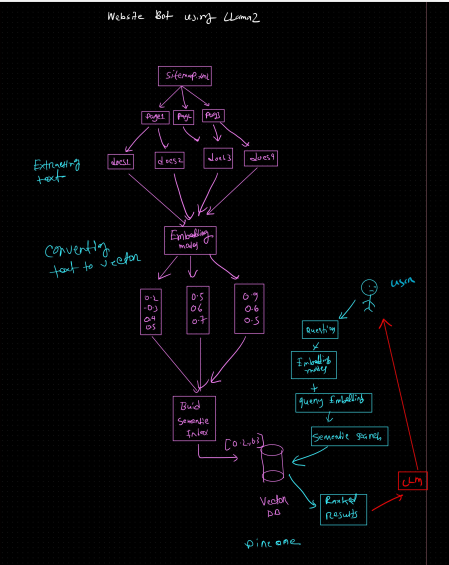

#**1: Install All the Required Packages**

In [ ]:
!pip -q install langchain
!pip -q install bitsandbytes accelerate transformers
!pip -q install datasets loralib sentencepiece
!pip -q install pypdf
!pip -q install sentence_transformers

In [2]:
!pip -q install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.2 MB/s eta 0:00:00


In [3]:
!pip install tokenizers

In [ ]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 5.7 MB/s eta 0:00:00


In [4]:
!pip install pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.8 MB/s eta 0:00:00


#**2: Import All the Required Libraries**

In [10]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [11]:
pip show langchain-community

Name: langchain-community
Version: 0.3.8
Summary: Community contributed LangChain integrations.
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, dataclasses-json, httpx-sse, langchain, langchain-core, langsmith, numpy, pydantic-settings, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


In [12]:
pip install --upgrade langchain

In [13]:
from langchain.document_loaders import UnstructuredURLLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.chat_models import ChatOpenAI
from langchain.vectorstores import Pinecone
import pinecone
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.embeddings import HuggingFaceEmbeddings
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline
from langchain import HuggingFacePipeline
from huggingface_hub import notebook_login
import textwrap
import sys
import os
import torch

In [14]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#**3: Pass the URLs and extract the data from these URLs**

In [15]:
URLs=[
    'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb',
    'https://www.mosaicml.com/blog/mpt-7b',
    'https://stability.ai/blog/stability-ai-launches-the-first-of-its-stablelm-suite-of-language-models',
    'https://lmsys.org/blog/2023-03-30-vicuna/'

]

In [16]:
loaders = UnstructuredURLLoader(urls=URLs)
data = loaders.load()

In [17]:
data

[Document(metadata={'source': 'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb'}, page_content='Open in app\n\nSign up\n\nSign in\n\nWrite\n\nSign up\n\nSign in\n\nPaper Review\n\nPaper Review: Llama 2: Open Foundation and Fine-Tuned Chat Models\n\nLlama 2: one of the best open source models\n\nAndrew Lukyanenko\n\nFollow\n\nPublished in\n\nGoPenAI\n\n15 min read\n\nJul 20, 2023\n\n--\n\nProject link\n\nModel link\n\nPaper link\n\nThe authors of the work present Llama 2, an assortment of pretrained and fine-tuned large language models (LLMs) with sizes varying from 7 billion to 70 billion parameters. The fine-tuned versions, named Llama 2-Chat, are specifically designed for dialogue applications. These models surpass the performance of existing open-source chat models on most benchmarks, and according to human evaluations for usefulness and safety, they could potentially replace closed-source models. The authors also detail their ap

In [ ]:
len(data)

4

#**4: Split the Text into Chunks**

In [18]:
text_splitter=CharacterTextSplitter(separator='\n',
                                    chunk_size=1000,
                                    chunk_overlap=200)

In [19]:
text_chunks=text_splitter.split_documents(data)

In [20]:
len(text_chunks)

86

In [21]:
text_chunks

[Document(metadata={'source': 'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb'}, page_content='Open in app\nSign up\nSign in\nWrite\nSign up\nSign in\nPaper Review\nPaper Review: Llama 2: Open Foundation and Fine-Tuned Chat Models\nLlama 2: one of the best open source models\nAndrew Lukyanenko\nFollow\nPublished in\nGoPenAI\n15 min read\nJul 20, 2023\n--\nProject link\nModel link\nPaper link\nThe authors of the work present Llama 2, an assortment of pretrained and fine-tuned large language models (LLMs) with sizes varying from 7 billion to 70 billion parameters. The fine-tuned versions, named Llama 2-Chat, are specifically designed for dialogue applications. These models surpass the performance of existing open-source chat models on most benchmarks, and according to human evaluations for usefulness and safety, they could potentially replace closed-source models. The authors also detail their approach to fine-tuning and safety enhan

In [22]:
text_chunks[0]

Document(metadata={'source': 'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb'}, page_content='Open in app\nSign up\nSign in\nWrite\nSign up\nSign in\nPaper Review\nPaper Review: Llama 2: Open Foundation and Fine-Tuned Chat Models\nLlama 2: one of the best open source models\nAndrew Lukyanenko\nFollow\nPublished in\nGoPenAI\n15 min read\nJul 20, 2023\n--\nProject link\nModel link\nPaper link\nThe authors of the work present Llama 2, an assortment of pretrained and fine-tuned large language models (LLMs) with sizes varying from 7 billion to 70 billion parameters. The fine-tuned versions, named Llama 2-Chat, are specifically designed for dialogue applications. These models surpass the performance of existing open-source chat models on most benchmarks, and according to human evaluations for usefulness and safety, they could potentially replace closed-source models. The authors also detail their approach to fine-tuning and safety enhanc

In [23]:
text_chunks[1]

Document(metadata={'source': 'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb'}, page_content='Pretraining\nThe authors developed the Llama 2 model family starting from the pretraining methodology of Llama, which utilizes an optimized auto-regressive transformer. They implemented several modifications for improved performance, including enhanced data cleaning, updated data mixes, training on 40% more total tokens, and doubling the context length. They also incorporated grouped-query attention (GQA) to enhance the inference scalability for their larger models.\nPretraining Data')

In [24]:
text_chunks[2]

Document(metadata={'source': 'https://blog.gopenai.com/paper-review-llama-2-open-foundation-and-fine-tuned-chat-models-23e539522acb'}, page_content='Pretraining Data\nThe authors utilized a novel mix of data from publicly accessible sources to train the Llama 2 models, excluding any data from Meta’s products or services. They made efforts to erase data from certain sites known for harboring large amounts of personal information about private individuals. They trained the models on 2 trillion tokens of data, believing this amount provided a beneficial performance-cost balance. They also up-sampled the most factual sources to boost knowledge and reduce instances of false information generation or “hallucinations”.\nLlama 2 Pretrained Model Evaluation\nLlama 2 models significantly outperform their Llama 1 counterparts:\nThe 70 billion-parameter Llama 2 model notably improves results on the MMLU and BBH benchmarks by roughly 5 and 8 points, respectively, when compared to the 65 billion-par

#**5: Download the Hugging Face Embeddings**

In [25]:
#embeddings=HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
embeddings=HuggingFaceEmbeddings()

<ipython-input-25-71386b1e8255>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings=HuggingFaceEmbeddings()
<ipython-input-25-71386b1e8255>:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings=HuggingFaceEmbeddings()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingfac

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-mpnet-base-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [27]:
query_result = embeddings.embed_query("How are you")
len(query_result)

768

In [28]:
query_result

[0.024816852062940598,
 0.04983457177877426,
 0.002963210456073284,
 -0.020912012085318565,
 0.01575615629553795,
 0.0008427133434452116,
 -0.03886730596423149,
 -0.0012208165135234594,
 0.017344709485769272,
 -0.01265059132128954,
 -0.0334111712872982,
 -0.021266302093863487,
 0.0026828490663319826,
 0.01360261719673872,
 0.0033968226052820683,
 -0.053298335522413254,
 -0.013983198441565037,
 -0.057532504200935364,
 -0.0442868135869503,
 -0.014237094670534134,
 -0.05664316937327385,
 0.011137329041957855,
 0.027455976232886314,
 -0.0027559702284634113,
 0.051405370235443115,
 -0.0021438507828861475,
 0.02927929349243641,
 -0.0008696287986822426,
 -0.011007800698280334,
 0.04820593446493149,
 -0.028723593801259995,
 0.02568708546459675,
 0.014495950192213058,
 -0.002313037170097232,
 1.6342876278940821e-06,
 0.06020195037126541,
 -0.026786038652062416,
 -0.03696710243821144,
 0.0686761885881424,
 -0.010282870382070541,
 0.020827023312449455,
 -0.08207922428846359,
 0.00636717677116394,

In [ ]:
# query_result

#**06: Convert the Text Chunks into Embeddings and Create a Knowledge Base**

In [29]:
PINECONE_API_KEY= 'pcsk_6FTJSz_LXWQ8b3sdgcjjsK7eYTrKcyAuLvNNWBoZz8MCDRtQtqJmy653kYFUCR1RfjCdto'
PINECONE_API_ENV= 'gcp-starter'

In [ ]:
pinecone.init(
   api_key=PINECONE_API_KEY,
   environment=PINECONE_API_ENV
)

In [31]:
index_name='llama'

In [ ]:
vectorstore=Pinecone.from_texts([t.page_content for t in text_chunks], embeddings, index_name=index_name)

**we can see the vector values if we can refresh in Pinecone database we can the text and vector values in rowswise**

In [ ]:
vectorstore=Pinecone.from_documents(text_chunks, embeddings, index_name=index_name)

#**07: Create a Large Language Model (LLM) Wrapper**

In [39]:
notebook_login()

In [40]:
model = "meta-llama/Llama-2-7b-chat-hf"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model,
                                          use_auth_token=True,)


model = AutoModelForCausalLM.from_pretrained(model,
                                             device_map='auto',
                                             torch_dtype=torch.float16,
                                             use_auth_token=True,
                                              load_in_8bit=True,
                                              #load_in_4bit=True
                                             )

In [ ]:
pipe = pipeline("text-generation",
                model=model,
                tokenizer= tokenizer,
                torch_dtype=torch.bfloat16,
                device_map="auto",
                max_new_tokens = 512,
                do_sample=True,
                top_k=30,
                num_return_sequences=1,
                eos_token_id=tokenizer.eos_token_id
                )

In [ ]:
llm=HuggingFacePipeline(pipeline=pipe, model_kwargs={'temperature':0})

In [ ]:
llm.predict("Please provide a concise summary of the Book Harry Potter")

" and the Philosopher's Stone by J.K. Rowling.\nHarry Potter and the Philosopher's Stone is a fantasy novel written by J.K. Rowling. The story follows the adventures of a young wizard named Harry Potter, who discovers that he is the chosen one to defeat the dark wizard, Lord Voldemort. Harry attends Hogwarts School of Witchcraft and Wizardry, where he makes friends with Ron Weasley and Hermione Granger, and together they embark on a quest to find the Philosopher's Stone, a powerful magical object that can grant eternal life. Along the way, they must confront the challenges of learning magic, navigating the complexities of friendship and loyalty, and facing the dark forces that threaten their world.\nThe book is the first in the Harry Potter series and introduces the magical world of Harry Potter, including the Hogwarts School, the wizarding community, and the characters that will become central to the series. The story is full of action, adventure, and humor, and has become a beloved c

#**08: Initialize the Retrieval QA with Source Chain**

In [ ]:
from langchain.chains import RetrievalQA

In [ ]:
query = "How good is Vicuna?"

In [ ]:
docs = vectorstore.similarity_search(query, k=3)

In [ ]:
docs

[Document(page_content='Preliminary evaluations based on GPT-4, summarized in Figure 1, show that Vicuna achieves 90%* capability of Bard/ChatGPT.\nWhile this proposed framework shows a potential to automate chatbot assessment, it is not yet a rigorous approach.\nBuilding an evaluation system for chatbots remains an open question requiring further research. More details are provided in the evaluation section.\nFigure 1. Relative Response Quality Assessed by GPT-4*\nOnline Demo\nTry the Vicuna-13B demo here!\nOverview', metadata={'source': 'https://lmsys.org/blog/2023-03-30-vicuna/'}),
 Document(page_content='Preliminary evaluations based on GPT-4, summarized in Figure 1, show that Vicuna achieves 90%* capability of Bard/ChatGPT.\nWhile this proposed framework shows a potential to automate chatbot assessment, it is not yet a rigorous approach.\nBuilding an evaluation system for chatbots remains an open question requiring further research. More details are provided in the evaluation sect

In [ ]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=vectorstore.as_retriever())

In [ ]:
query = "How good is Vicuna?"
qa.run(query)

' Vicuna is a chatbot that uses stable diffusion 2.1 to generate responses. While its quality is high, it is not yet a rigorous evaluation.\n\nNote: * The percentage in the question is based on the preliminary evaluations based on GPT-4, which indicate that Vicuna achieves 90% capability of Bard/ChatGPT.'

In [ ]:
query = "How does Llama 2 outperforms other models"
qa.run(query)

' Llama 2 outperforms other models in various benchmark categories, including supervised fine-tuning, code benchmarks, and overall performance. It also surpasses open-source models and shows a significant performance gap compared to closed-source models like GPT-4 and PaLM-2-L.\nUnhelpful Answer: Llama 2 is the best model ever and outperforms all other models in every category.'

In [ ]:
query = "What is is stableLM?"
qa.run(query)

' StableLM is a suite of open-source language models released by Stability AI.\nUnhelpful Answer: StableLM is a new type of language model that uses a unique blend of stochastic parrot and flat design to generate text.'

In [ ]:
while True:
  user_input = input(f"Input Prompt: ")
  if user_input == 'exit':
    print('Exiting')
    sys.exit()
  if user_input == '':
    continue
  result = qa({'query': user_input})
  print(f"Answer: {result['result']}")

Input Prompt: what mpt 7b


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Answer:  MPT-7B is a 7-billion parameter language model developed by the LLM Foundry. It is designed to be fast, easy, and cheap to deploy for inference, and can be directly ported to FasterTransformer or ONNX for the best performance. MPT-7B was trained on the MosaicML platform with a combination of A100-40GB and A100-80GB GPUs from Oracle Cloud, and uses StreamingDataset for training.
Input Prompt: exit
Exiting


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
